In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

import yfinance as yf

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from scipy.optimize import minimize

import pandas_datareader.data as web
import datetime as dt
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
import plotly.graph_objects as go
from numpy import random ; from random import randint
from matplotlib import cm


In [3]:
amzn=pd.read_csv('AMZN_small.csv')
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,3048.500000,3089.000000,3017.000000,3071.260010,3071.260010,2878500
1,2022-03-01,3054.649902,3081.979980,2999.540039,3022.840088,3022.840088,2243700
2,2022-03-02,3016.979980,3059.989990,2975.000000,3041.050049,3041.050049,2366700
3,2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900
4,2022-03-04,2943.179932,2957.000000,2876.139893,2912.820068,2912.820068,3046700


In [4]:
amzn.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
16,2022-03-22,3236.110107,3323.340088,3233.97998,3297.780029,3297.780029,3204300
17,2022-03-23,3274.100098,3327.399902,3253.73999,3268.159912,3268.159912,2790600
18,2022-03-24,3274.989990,3282.370117,3201.00000,3272.989990,3272.989990,2839900
19,2022-03-25,3280.000000,3307.370117,3245.00000,3295.469971,3295.469971,2451600
20,2022-03-25,3280.000000,3307.370117,3247.48999,3295.469971,3295.469971,2454275


In [5]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume
count,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01
mean,3046.427618,3092.261905,2994.672387,3046.841460,3046.841460,3.554223e+06
std,167.536466,167.381715,184.203670,191.979708,191.979708,1.071691e+06
min,2733.669922,2805.000000,2671.449951,2720.290039,2720.290039,2.243700e+06
25%,2919.620117,2959.699951,2876.139893,2912.820068,2912.820068,2.839900e+06
50%,3048.500000,3078.580078,2975.000000,3041.050049,3041.050049,3.326900e+06
75%,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,4.132800e+06
max,3280.000000,3327.399902,3253.739990,3297.780029,3297.780029,6.753100e+06


In [7]:
amzn.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
amzn = amzn.replace({'\$':''},regex=True)
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,3048.500000,3089.000000,3017.000000,3071.260010,3071.260010,2878500
1,2022-03-01,3054.649902,3081.979980,2999.540039,3022.840088,3022.840088,2243700
2,2022-03-02,3016.979980,3059.989990,2975.000000,3041.050049,3041.050049,2366700
3,2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900
4,2022-03-04,2943.179932,2957.000000,2876.139893,2912.820068,2912.820068,3046700


In [12]:
df=amzn
df=df.astype({'Date':object,'Open':float,'High':float,'Low':float,'Close':float,'Adj Close':float,'Volume':int})
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int32
dtype: object

In [15]:
df.describe(exclude=float)
df.describe(include=float)

,Date,Volume
count,21,2.100000e+01
unique,20,NaN
top,2022-03-25,NaN
freq,2,NaN
mean,NaN,3.554223e+06
std,NaN,1.071691e+06
min,NaN,2.243700e+06
25%,NaN,2.839900e+06
50%,NaN,3.326900e+06
75%,NaN,4.132800e+06


In [17]:
df.describe(percentiles=[0.1,0.5,0.9])['Volume']

count    2.100000e+01
mean     3.554223e+06
std      1.071691e+06
min      2.243700e+06
10%      2.451600e+06
50%      3.326900e+06
90%      4.583100e+06
max      6.753100e+06
Name: Volume, dtype: float64

In [20]:
tnai1=df['Open']>3000
largeOpen = df.loc[tnai1]
largeOpen.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-28,3048.500000,3089.000000,3017.000000,3071.260010,3071.260010,2878500
1,2022-03-01,3054.649902,3081.979980,2999.540039,3022.840088,3022.840088,2243700
2,2022-03-02,3016.979980,3059.989990,2975.000000,3041.050049,3041.050049,2366700
3,2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900
13,2022-03-17,3052.810059,3149.969971,3042.800049,3144.780029,3144.780029,3646700


In [21]:
tnai2=df['Close']<3000
largeOpenSmallClose=df.loc[tnai1&tnai2]
largeOpenSmallClose.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3,2022-03-03,3070.629883,3078.580078,2937.120117,2957.969971,2957.969971,3259900


<AxesSubplot:title={'center':'YoMamasAss'}, xlabel='Date'>

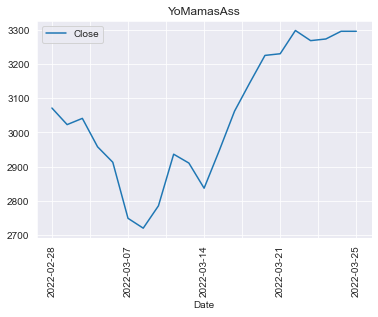

In [25]:
df.plot(x='Date',y='Close',rot=90,title = 'YoMamasAss')

<AxesSubplot:title={'center':'YoMamasAss'}, xlabel='Date', ylabel='Close'>

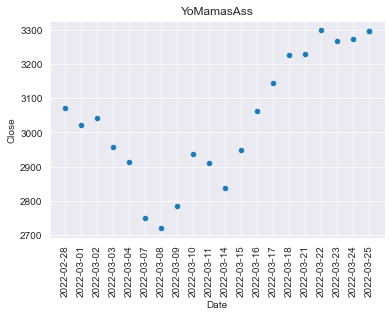

In [26]:
df.plot(x='Date',y='Close',rot=90,title = 'YoMamasAss',kind='scatter')

<AxesSubplot:title={'center':'YoMamasAss'}, ylabel='Frequency'>

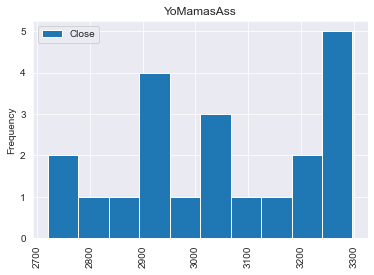

In [27]:
df.plot(x='Date',y='Close',rot=90,title = 'YoMamasAss',kind='hist')

In [28]:
largeOpenBiggerThan3000smallCloseSmallerThan3000 = largeOpenSmallClose
largeOpenBiggerThan3000smallCloseSmallerThan3000.to_csv('3000PlusOpen3000MinusClose.csv')

In [30]:
Max = max(df['Low'])
Min = min(df['Low'])
print(f'Max={Max},Min={Min},Diff={Max-Min}')

Max=3253.73999,Min=2671.449951,Diff=582.290039
